# Aircraft Dataset Exploration and Analysis

This notebook explores two aircraft datasets:
1. **Military Aircraft Detection Dataset** - 22,177 images with bounding box annotations for military aircraft
2. **FGVC-Aircraft 2013b** - 10,000 images of 102 different aircraft variants (commercial and military)

Let's explore and analyze these datasets!


In [2]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
%matplotlib inline

print("✓ Libraries imported successfully!")


✓ Libraries imported successfully!


## 1. Explore Military Aircraft Detection Dataset

This dataset contains 22,177 images with bounding box annotations for various military aircraft types.


In [3]:
# Load military aircraft detection dataset
DATA_DIR = Path('../data')
DATASET_DIR = DATA_DIR / 'dataset'

# Load the annotation files
train_df = pd.read_csv(DATA_DIR / 'train.csv')
test_df = pd.read_csv(DATA_DIR / 'test.csv')
val_df = pd.read_csv(DATA_DIR / 'val.csv')
labels_df = pd.read_csv(DATA_DIR / 'labels_with_split.csv')

print(f"✓ Military Aircraft Dataset Loaded:")
print(f"  - Training images: {len(train_df)}")
print(f"  - Test images: {len(test_df)}")
print(f"  - Validation images: {len(val_df)}")
print(f"  - Total annotations: {len(labels_df)}")
print(f"\nFirst few rows of training data:")
train_df.head()


✓ Military Aircraft Dataset Loaded:
  - Training images: 3334
  - Test images: 3333
  - Validation images: 3333
  - Total annotations: 39482

First few rows of training data:


filename  Classes  Labels
0  1025794.jpg  707-320       0
1  1340192.jpg  707-320       0
2  0056978.jpg  707-320       0
3  0698580.jpg  707-320       0
4  0450014.jpg  707-320       0

In [4]:
# Analyze class distribution in military aircraft dataset
print("Class Distribution in Military Aircraft Dataset:")
print("=" * 50)
class_counts = labels_df['class'].value_counts()
print(class_counts)
print(f"\nTotal number of unique aircraft types: {len(class_counts)}")


Class Distribution in Military Aircraft Dataset:
class
F16     1941
F18     1750
C130    1581
F15     1541
F35     1534
        ... 
XQ58      41
J50       39
V280      39
WZ10      20
WZ9       15
Name: count, Length: 96, dtype: int64

Total number of unique aircraft types: 96


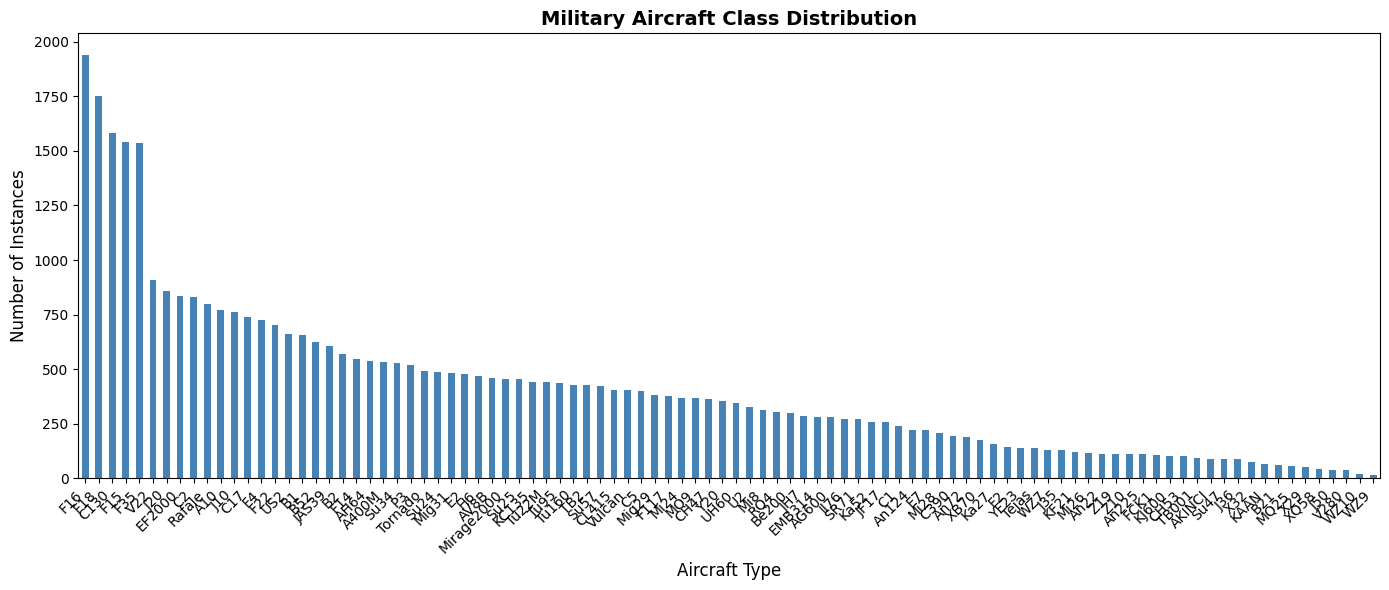

In [5]:
# Visualize class distribution
plt.figure(figsize=(14, 6))
class_counts.plot(kind='bar', color='steelblue')
plt.title('Military Aircraft Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Aircraft Type', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [6]:
# Function to load and visualize images with bounding boxes
def visualize_aircraft_with_bbox(filename, annotations_df, dataset_dir):
    """
    Visualize an aircraft image with its bounding boxes.
    
    Args:
        filename: Image filename (without extension)
        annotations_df: DataFrame with annotations
        dataset_dir: Directory containing images
    """
    # Load image
    img_path = dataset_dir / f"{filename}.jpg"
    if not img_path.exists():
        print(f"Image not found: {img_path}")
        return None
    
    img = cv2.imread(str(img_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Get annotations for this image
    img_annotations = annotations_df[annotations_df['filename'] == filename]
    
    # Draw bounding boxes
    for _, row in img_annotations.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        aircraft_class = row['class']
        
        # Draw rectangle
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 3)
        
        # Add label
        label = f"{aircraft_class}"
        (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
        cv2.rectangle(img_rgb, (x1, y1 - text_height - 10), (x1 + text_width, y1), (0, 255, 0), -1)
        cv2.putText(img_rgb, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
    
    return img_rgb, img_annotations

print("✓ Visualization function defined")


✓ Visualization function defined


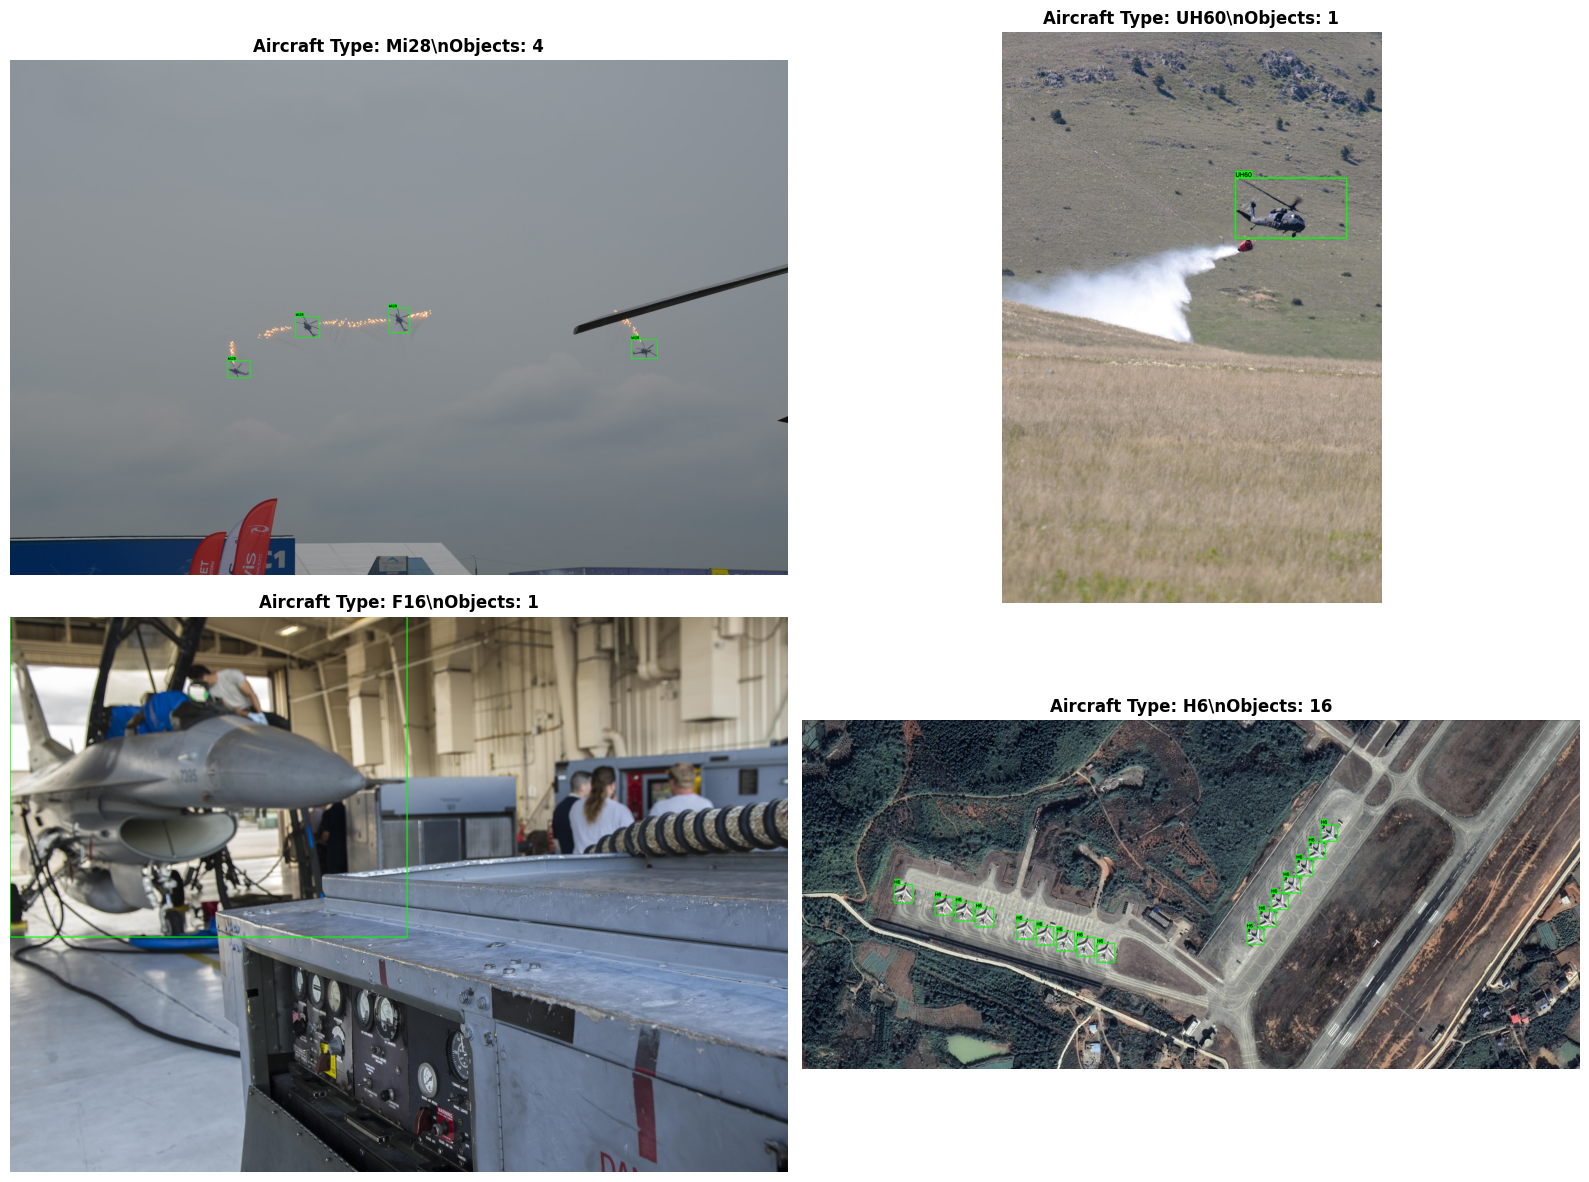

In [7]:
# Visualize sample images from military aircraft dataset
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# Get 4 random samples from different classes
sample_classes = labels_df['class'].unique()[:4]

for idx, aircraft_class in enumerate(sample_classes):
    # Get a random image of this class
    sample = labels_df[labels_df['class'] == aircraft_class].iloc[0]
    filename = sample['filename']
    
    # Visualize
    img_rgb, annotations = visualize_aircraft_with_bbox(filename, labels_df, DATASET_DIR)
    
    if img_rgb is not None:
        axes[idx].imshow(img_rgb)
        axes[idx].set_title(f"Aircraft Type: {aircraft_class}\\nObjects: {len(annotations)}", 
                           fontsize=12, fontweight='bold')
        axes[idx].axis('off')

plt.tight_layout()
plt.show()


## 2. Explore FGVC-Aircraft Dataset

This dataset contains 10,000 images of 102 different aircraft variants for fine-grained classification.


In [8]:
# Load FGVC-Aircraft dataset
FGVC_DIR = DATA_DIR / 'fgvc-aircraft-2013b' / 'fgvc-aircraft-2013b' / 'data'
FGVC_IMAGES_DIR = FGVC_DIR / 'images'

# Load variant annotations (main classification task)
def load_fgvc_annotations(file_path):
    """Load FGVC annotations from text file."""
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split(' ', 1)
            if len(parts) == 2:
                image_id, label = parts
                data.append({'image_id': image_id, 'label': label})
    return pd.DataFrame(data)

# Load train/val/test splits
fgvc_train = load_fgvc_annotations(FGVC_DIR / 'images_variant_train.txt')
fgvc_val = load_fgvc_annotations(FGVC_DIR / 'images_variant_val.txt')
fgvc_test = load_fgvc_annotations(FGVC_DIR / 'images_variant_test.txt')

print(f"✓ FGVC-Aircraft Dataset Loaded:")
print(f"  - Training images: {len(fgvc_train)}")
print(f"  - Validation images: {len(fgvc_val)}")
print(f"  - Test images: {len(fgvc_test)}")
print(f"  - Total images: {len(fgvc_train) + len(fgvc_val) + len(fgvc_test)}")
print(f"\nFirst few rows:")
fgvc_train.head()


✓ FGVC-Aircraft Dataset Loaded:
  - Training images: 3334
  - Validation images: 3333
  - Test images: 3333
  - Total images: 10000

First few rows:


image_id    label
0  1025794  707-320
1  1340192  707-320
2  0056978  707-320
3  0698580  707-320
4  0450014  707-320

In [9]:
# Analyze FGVC class distribution
print("FGVC Aircraft Variant Distribution (Top 20):")
print("=" * 50)
fgvc_all = pd.concat([fgvc_train, fgvc_val, fgvc_test])
variant_counts = fgvc_all['label'].value_counts()
print(variant_counts.head(20))
print(f"\nTotal number of aircraft variants: {len(variant_counts)}")


FGVC Aircraft Variant Distribution (Top 20):
label
707-320                100
Dornier 328            100
F/A-18                 100
F-16A/B                100
Eurofighter Typhoon    100
Embraer Legacy 600     100
ERJ 145                100
ERJ 135                100
EMB-120                100
E-195                  100
E-190                  100
E-170                  100
DR-400                 100
727-200                100
DHC-8-300              100
DHC-8-100              100
DHC-6                  100
DHC-1                  100
DH-82                  100
DC-9-30                100
Name: count, dtype: int64

Total number of aircraft variants: 100


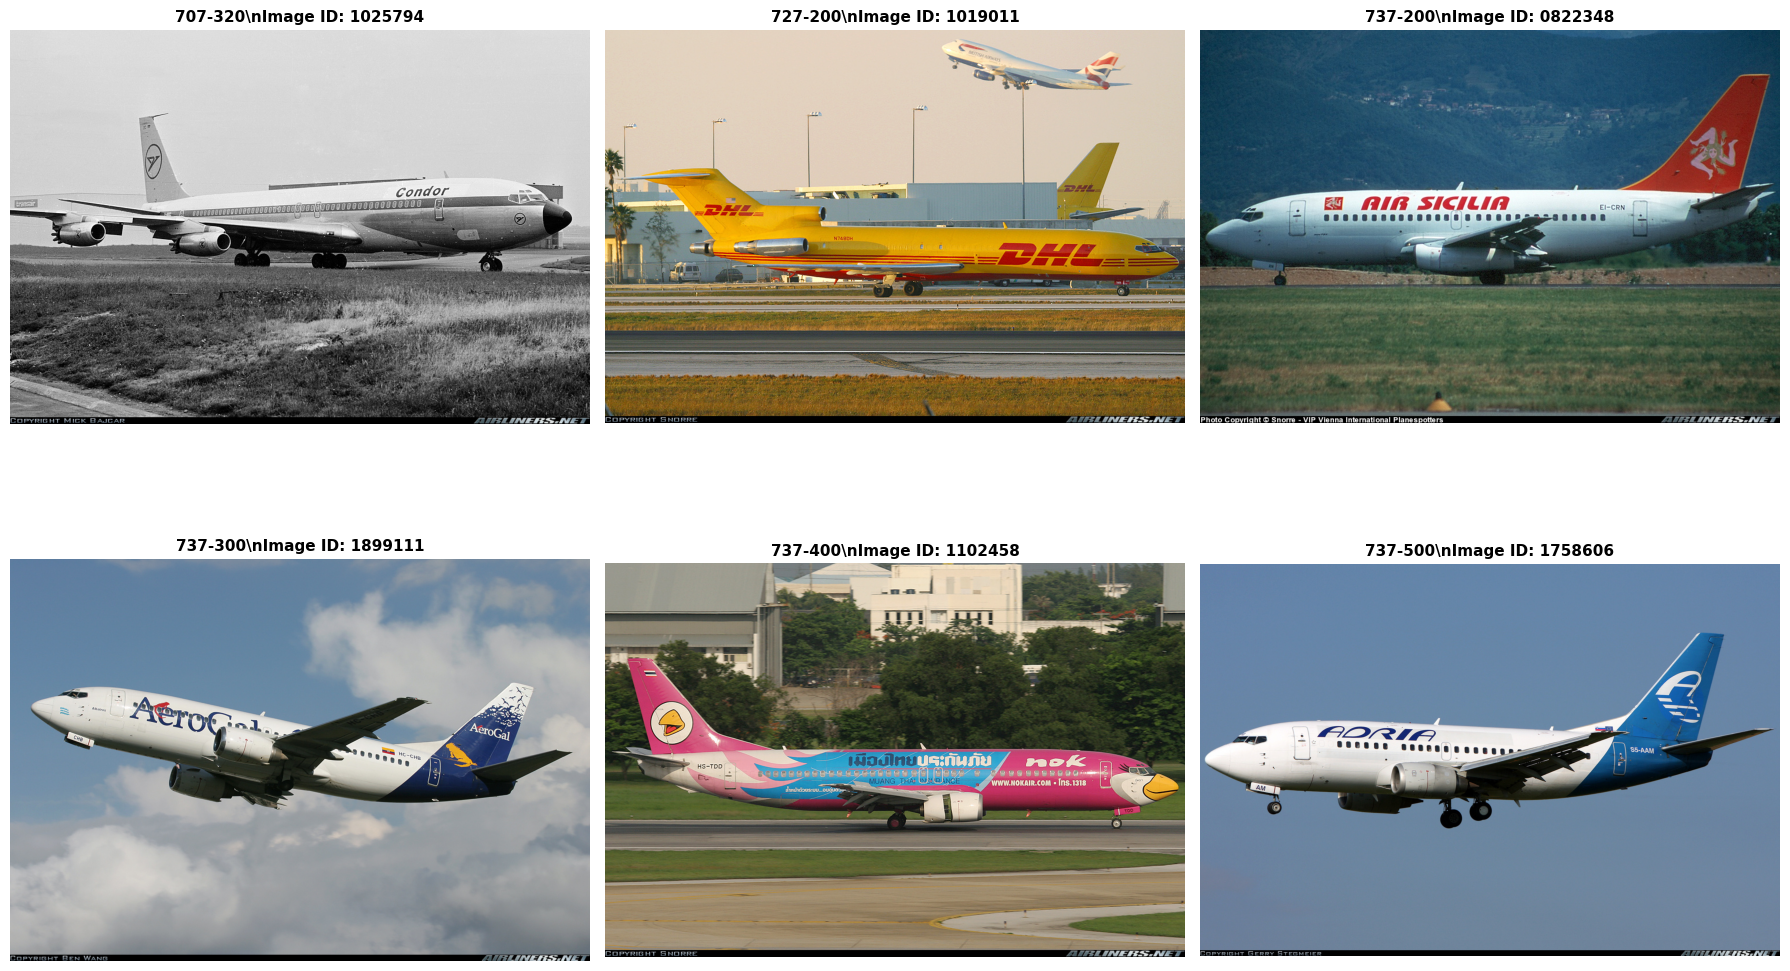

In [10]:
# Visualize FGVC sample images
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Get 6 random samples
sample_variants = fgvc_all['label'].unique()[:6]

for idx, variant in enumerate(sample_variants):
    # Get a random image of this variant
    sample = fgvc_all[fgvc_all['label'] == variant].iloc[0]
    image_id = sample['image_id']
    
    # Load and display image
    img_path = FGVC_IMAGES_DIR / f"{image_id}.jpg"
    if img_path.exists():
        img = cv2.imread(str(img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        axes[idx].imshow(img_rgb)
        axes[idx].set_title(f"{variant}\\nImage ID: {image_id}", 
                           fontsize=11, fontweight='bold')
        axes[idx].axis('off')

plt.tight_layout()
plt.show()


## 3. Dataset Comparison and Analysis


In [11]:
# Compare the two datasets
comparison = pd.DataFrame({
    'Dataset': ['Military Aircraft Detection', 'FGVC-Aircraft'],
    'Total Images': [22177, 10000],
    'Unique Classes': [len(class_counts), len(variant_counts)],
    'Train Split': [len(train_df), len(fgvc_train)],
    'Val Split': [len(val_df), len(fgvc_val)],
    'Test Split': [len(test_df), len(fgvc_test)],
    'Has Bounding Boxes': ['Yes', 'Yes'],
    'Primary Use': ['Object Detection (Military)', 'Fine-Grained Classification']
})

print("Dataset Comparison:")
print("=" * 80)
print(comparison.to_string(index=False))
print("\\n" + "=" * 80)


Dataset Comparison:
                    Dataset  Total Images  Unique Classes  Train Split  Val Split  Test Split Has Bounding Boxes                 Primary Use
Military Aircraft Detection         22177              96         3334       3333        3333                Yes Object Detection (Military)
              FGVC-Aircraft         10000             100         3334       3333        3333                Yes Fine-Grained Classification
\n================================================================================


## 4. Key Insights

### Military Aircraft Detection Dataset:
- **22,177 images** with bounding box annotations
- Focused on **military aircraft** (helicopters, fighters, bombers, etc.)
- Multiple objects can appear in a single image
- Perfect for **object detection** tasks
- Good for threat detection as it specifically labels military aircraft types

### FGVC-Aircraft Dataset:
- **10,000 images** of 102 aircraft variants  
- Mix of **commercial and military** aircraft
- Fine-grained labels (e.g., Boeing 737-700, F-16, etc.)
- Perfect for **classification** tasks
- Useful for identifying specific aircraft models

### Recommended Approach:
1. **Use Military Aircraft Dataset** for object detection training (YOLO)
2. **Use FGVC Dataset** to improve classification accuracy and add commercial aircraft recognition
3. **Combine both** for a comprehensive threat detection system that can:
   - Detect and localize aircraft (from Military dataset)
   - Classify them into specific variants (from FGVC dataset)
   - Assess threat level based on classification (military vs. commercial)


## 5. Next Steps

Now that we've explored both datasets, here are the recommended next steps:
